# Analyse des anomalies dans les donnees du bitcoin en se basant sur les patterns

### Introduction

Bla bla bla ...

Traduire et adapter ca :
In a closed economic system like blockchain, the total amount of generated cryp-
tocurrency called bitcoin is conserved and the transaction patterns demonstrate an
insight of money flow inside the blockchain. For the last 2 years, bitcoin market
has grabbed an immense attention from the investors, technology entrepreneurs
and currency enthusiasts. In this paper, we have come up with some findings in our
investigation about the bitcoin time-series transaction patterns. We have graphically
represented bitcoin’s weekly patterns as a real economic currency that has been
minted, stored and exchanged inside the bitcoin blockchain network. We identified
outliers’ activities with the help of descriptive statistical analysis. We also demon-
strated transaction pattern behavioral change. The main implication of these findings
is to understand some stylized facts of the time-series transaction of cryptocurrency-
based fully digital financial system. Besides in our analysis, we have shown that
the behavioral change of the transaction pattern is capable of explaining the system
development events or major historical events that have a network impact

This paper is basically focused on three aspects of blockchain-based open
source financial data. First of all, we re-structured blockchain’s already extracted
database (Kondor et al. 2014) for generating a hawk-eye view to observe bitcoin’s
daily transaction patterns to understand its economic growth with the course of
time. Secondly, we had done the descriptive analysis on that database of daily
transaction number and bitcoin volume to understand some of the most interest-
ing and informative statistical distribution. Finally, we had investigated the rank
distribution of some of the distinct transactions and their descriptive statistical
facts to extract some network topological features.

In [180]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from datetime import datetime
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Dataset

Expliquer la provenence des donnees (Défi EGC 2024: Jeu de données Bitcoin) -> https://github.com/Yquetzal/DefiEGC2024
Pas tres long car tout le mond esait d'ou elles viennent

Expliquer quelles donnees du dataset on va utiliser et pourquoi


In [237]:
# extracting data
global_data = pd.read_csv('egc2024/timeseries/global.csv')
# removing unecessary data
global_data = global_data.drop(['year',	'month', 'day'], axis=1)
global_data = global_data.rename(columns={ global_data.columns[0]: "date" })
global_data['date'] = pd.to_datetime(global_data['date'])
global_data

,date,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
0,2015-01-01,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
1,2015-01-02,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2,2015-01-03,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
3,2015-01-04,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
4,2015-01-05,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2017-06-26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,2.771988,248091,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387
908,2017-06-27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,3.044288,269658,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281
909,2017-06-28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,2.884102,274705,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847
910,2017-06-29,33153365173,317698686929569,317543686929569,144453.442667,3.669758e+08,2.760877,229509,570680,2.451838,2.486526,124,188153365173,155000000000,16909883109542,317698686929569,300788803820027


In [238]:
# load bitcoin price data
external_data = pd.read_csv('egc2024/timeseries/external.csv')
# drop first column
external_data.drop(columns=external_data.columns[0], axis=1, inplace=True)
# convert date type
external_data.date = pd.to_datetime(external_data.date)
external_data

,date,PriceUSD,HashRate
0,2015-01-02,315.942732,3.333450e+05
1,2015-01-03,285.647310,3.272842e+05
2,2015-01-04,263.334575,3.474869e+05
3,2015-01-05,275.003852,3.151626e+05
4,2015-01-06,287.549521,3.192031e+05
...,...,...,...
906,2017-06-26,2426.365051,5.023770e+06
907,2017-06-27,2530.345536,4.634604e+06
908,2017-06-28,2562.792264,5.554450e+06
909,2017-06-29,2540.443032,4.245439e+06


### Analyse générale

Nous allons d'abord extraires les statistiques globales des donnees du fichier blockchain_global.csv car ce fichier est le plus representatif de la blockchain dans sa totalite. Nous avons pris les statistiques récapitulatives de nos données et extrait quelques informations importantes.

In [217]:
cols = ['nb_transactions', 'nb_mining', 'volume_without_self', 'total_mining_satoshi']

desc = global_data[cols].describe()

skl = []
ktl = []
for c in cols:
    skewness = global_data[c].skew()
    kurtosis = global_data[c].kurtosis()
    skl.append(skewness)
    ktl.append(kurtosis)

desc.loc['skewness'] = skl
desc.loc['kurtosis'] = ktl

desc

,nb_transactions,nb_mining,volume_without_self,total_mining_satoshi
count,912.000000,912.000000,9.120000e+02,9.120000e+02
mean,197946.012061,149.918860,2.152958e+14,3.097439e+11
std,72578.218717,13.904488,2.780223e+14,8.976175e+10
min,58882.000000,110.000000,4.054264e+13,1.501451e+11
25%,125391.000000,140.000000,1.149386e+14,2.097130e+11
50%,208736.500000,149.000000,1.753236e+14,3.453659e+11
75%,248158.250000,158.000000,2.401501e+14,3.826720e+11
max,375231.000000,212.000000,6.360983e+15,5.335712e+11
skewness,0.088450,0.419397,1.400964e+01,-2.227207e-01
kurtosis,-1.019487,0.575691,2.770360e+02,-1.443772e+00


Juste en observant les valeurs, on peut conclure que le nombre de transactions est assez grand pour mesurer la distribution statistique.

Pour le nombre de transactions par jour (nb_transactions), les valeurs moyennes (mean) et médianes (50%) sont presque identiques (197946 et 208736), ce qui signifie que le nombre de transactions est normalement distribué.

En moyenne, il y a 150 nouveaux blocs par jour (nb_mining), ce qui est très proche de la valeur théorique de 6 blocs/heure (6 * 24 = 144).

Le volume journalier montre des statistiques opposées (volume_without_self). Nous pouvons remarquer que la valeur médiane est inférieure à la moyenne (1.753236e+14 contre 2.152958e+14). Cette asymétrie est confirmée par le calcul de skewness. La skewness (asymétrie en français) est une mesure statistique qui permet de quantifier l'asymétrie d'une distribution de valeurs par rapport à la distribution normale.

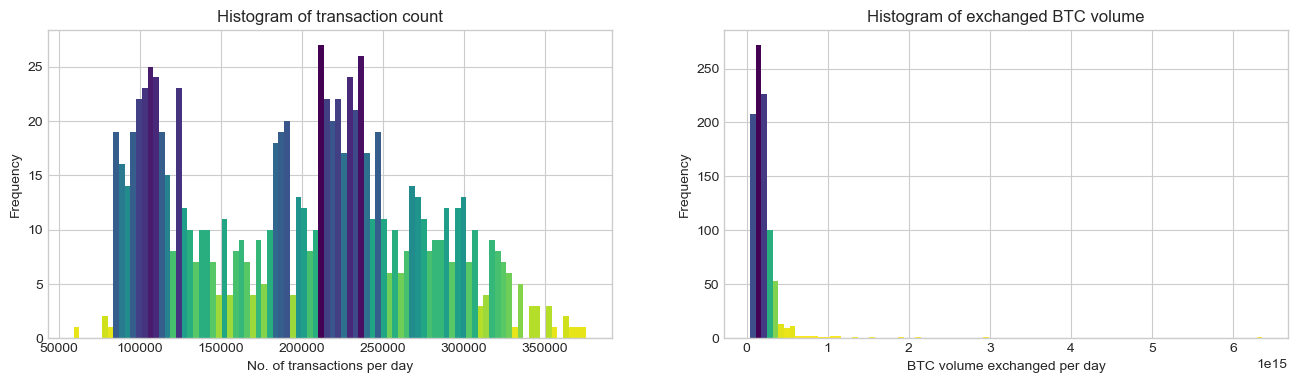

In [218]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))

n, bins, patches = ax1.hist(global_data['nb_transactions'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(1 - n[i]/max(n)))
ax1.set_title('Histogram of transaction count', fontsize=12)
ax1.set_xlabel('No. of transactions per day', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

n, bins, patches = ax2.hist(global_data['volume_without_self'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(1 - n[i]/max(n)))
ax2.set_title('Histogram of exchanged BTC volume', fontsize=12)
ax2.set_xlabel('BTC volume exchanged per day', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

plt.show()

Les deux histogrammes démontrent bien que le nombre de transactions est fortement asymétrique, contrairement au volume de bitcoins échangés.

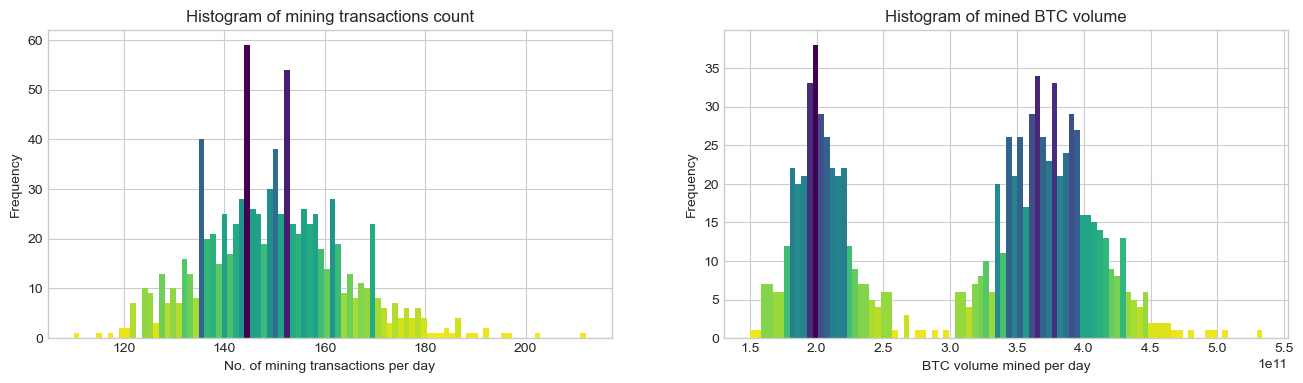

In [219]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))

n, bins, patches = ax1.hist(global_data['nb_mining'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(1 - n[i]/max(n)))
ax1.set_title('Histogram of mining transactions count', fontsize=12)
ax1.set_xlabel('No. of mining transactions per day', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

n, bins, patches = ax2.hist(global_data['total_mining_satoshi'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(1 - n[i]/max(n)))
ax2.set_title('Histogram of mined BTC volume', fontsize=12)
ax2.set_xlabel('BTC volume mined per day', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

plt.show()

Le coefficient d'aplatissement (kurtosis en anglais) est une mesure statistique qui permet de quantifier l'aplatissement d'une distribution de valeurs par rapport à la distribution normale. Le coefficient d'aplatissement peut aider à déterminer si une distribution de données est similaire à une distribution normale, et à identifier les écarts par rapport à une distribution normale. C'est une mesure utile pour l'analyse de données et la modélisation statistique.

Le volume de bitcoins minés par jour (total_mining_satoshi) montre également un skewness et un kurtosis importants, ce qui nous conduit à observer les données à l'échelle logarithmique.

### Le rendement logarithmique et la fonction d'auto-corrélation

Le log return, ou rendement logarithmique en français, est une mesure couramment utilisée en finance pour évaluer la performance d'un actif financier tel que des actions, des obligations ou des devises. Le log return mesure le taux de variation des prix d'un actif financier sur une période donnée en utilisant le logarithme naturel des prix plutôt que les prix eux-mêmes. Le calcul du log return permet de normaliser les données et de les rendre plus facilement comparables, en prenant en compte les variations relatives de prix plutôt que les variations absolues.

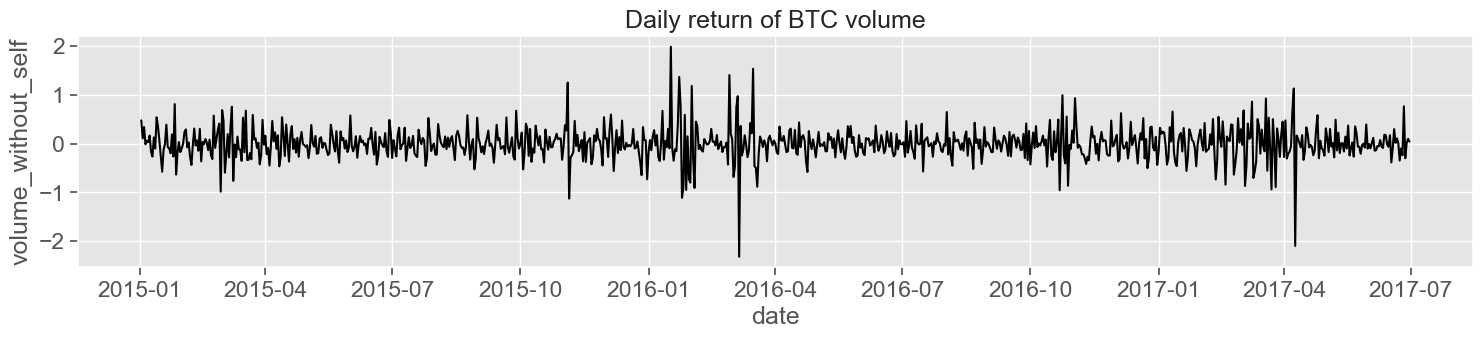

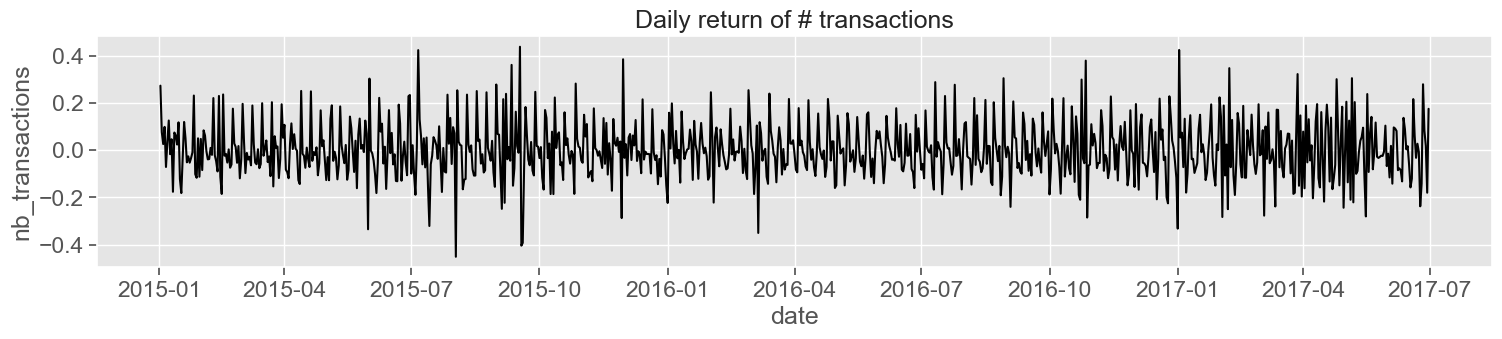

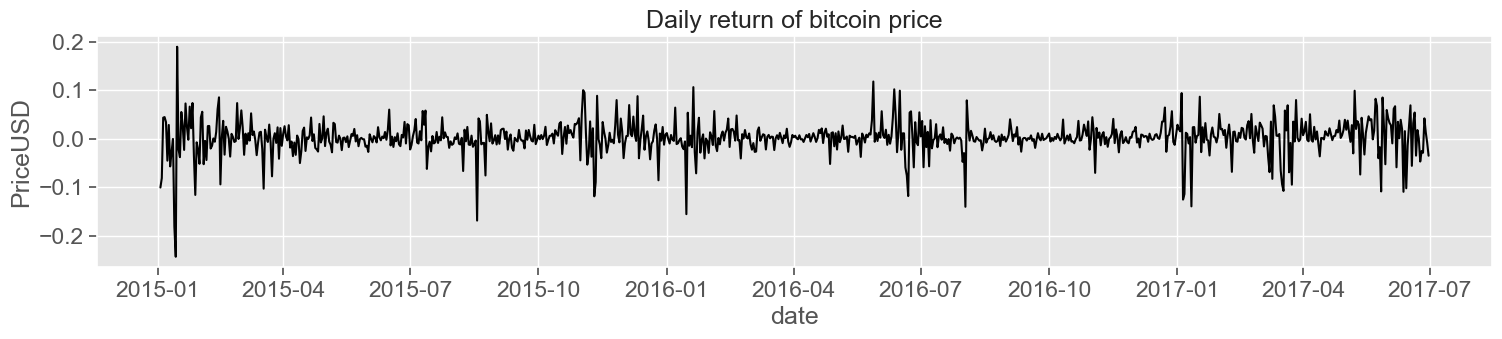

In [250]:
plt.style.use('ggplot')
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 1.5})

plt.subplots(figsize=(18, 3))
sns.lineplot(x='date', y=np.log(global_data.volume_without_self).diff(1).shift(0), data=global_data, color='black')
plt.title('Daily return of BTC volume')

plt.subplots(figsize=(18, 3))
sns.lineplot(x='date', y=np.log(global_data.nb_transactions).diff(1).shift(0), data=global_data, color='black')
plt.title('Daily return of # transactions')

plt.subplots(figsize=(18, 3))
sns.lineplot(x='date', y=np.log(external_data.PriceUSD).diff(1).shift(0), data=external_data, color='black')
plt.title('Daily return of bitcoin price')

plt.show()

On identifie plusieurs points de rupture, qu'on peut associer aux différents événements importants de l'actualité :
- Pour le volume en mai 2016 : Craig Wright se présente comme le vrai Satoshi.
- Pour le volume en avril 2017 : Le Japon reconnaît le Bitcoin comme monnaie légale.
- Pour le nombre de transactions en août 2015 : les développeurs de Bitcoin sortent Bitcoin XT.
- Pour le nombre de transactions en septembre 2015 : Bitcoin est classé comme une marchandise aux États-Unis.
- Pour le nombre de transactions en janvier 2017 : Bitcoin dépasse les 1000$.
- Pour le prix en janvier 2015 : cyberattaque de Bitstamp.

Nous allons maintenant afficher les fonctions d'autocorrélation pour ces trois données. La fonction d'autocorrélation est une mesure statistique qui permet d'évaluer le degré de corrélation linéaire entre les valeurs d'une série temporelle et ses propres valeurs retardées (décalées dans le temps). Cette métrique est utilisée pour déterminer si les valeurs d'une série temporelle dépendent les unes des autres ou non. Elle permet également d'identifier les patterns récurrents ou les cycles présents dans la série temporelle.

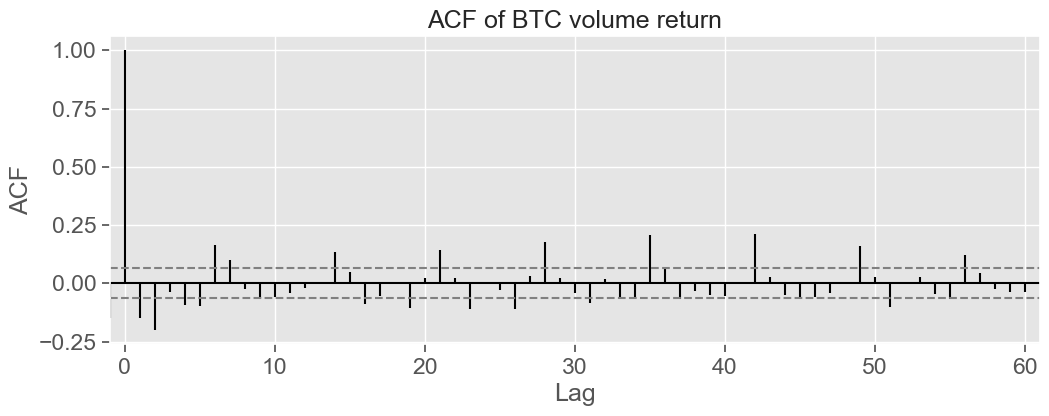

In [232]:
data = np.log(global_data.volume_without_self).diff(1).shift(0).to_numpy()
data[0] = 0

plt.subplots(figsize=(12, 4))

# adding plot annotations
plt.title('ACF of BTC volume return')
plt.ylabel('ACF')
plt.xlabel('Lag')
 
# plotting the Autocorrelation plot
plt.acorr(data, maxlags = 60, usevlines= True, color='black')
plt.xlim([-1, 61])

# adding the dotted line for 95% confidence interval
ci = 1.96 / np.sqrt(len(data))
plt.axhline(y=ci, linestyle='--', color='gray')
plt.axhline(y=-ci, linestyle='--', color='gray')
 
# displaying the plot
plt.grid(True)
 
plt.show()

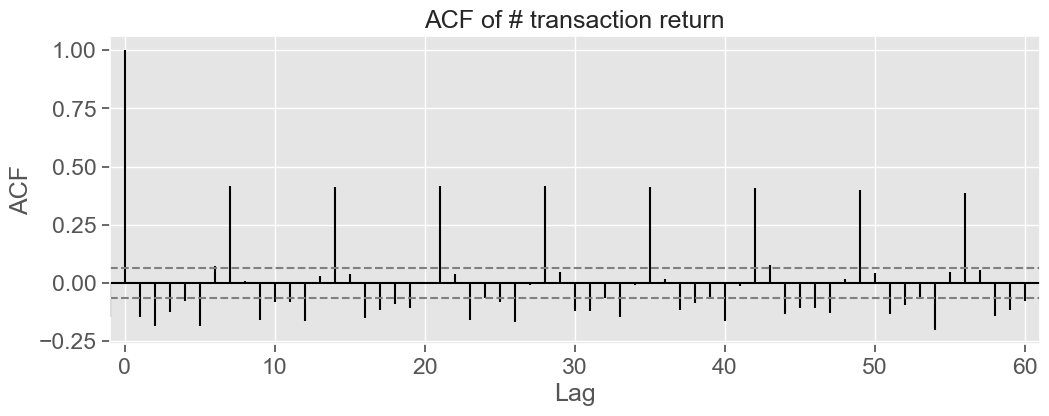

In [252]:
data = np.log(global_data.nb_transactions).diff(1).shift(0).to_numpy()
data[0] = 0

plt.subplots(figsize=(12, 4))

# adding plot annotations
plt.title('ACF of # transaction return')
plt.ylabel('ACF')
plt.xlabel('Lag')
 
# plotting the Autocorrelation plot
plt.acorr(data, maxlags = 60, usevlines= True, color='black')
plt.xlim([-1, 61])

# adding the dotted line for 95% confidence interval
ci = 1.96 / np.sqrt(len(data))
plt.axhline(y=ci, linestyle='--', color='gray')
plt.axhline(y=-ci, linestyle='--', color='gray')
 
# displaying the plot
plt.grid(True)
 
plt.show()

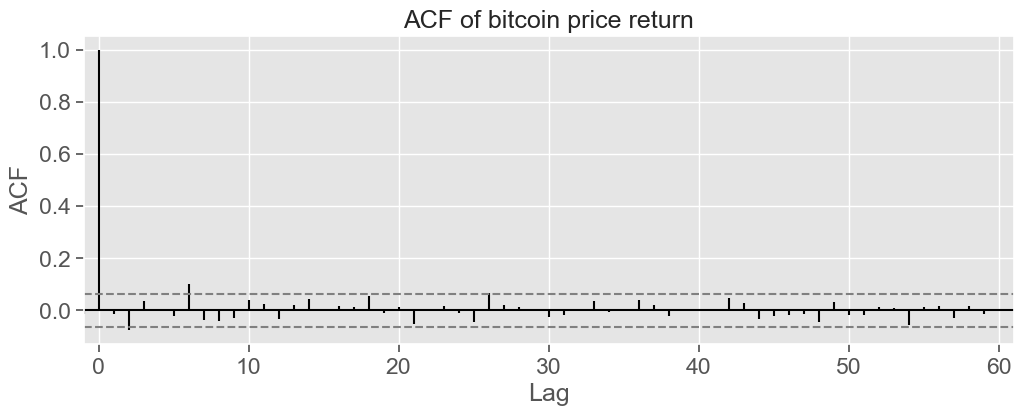

In [234]:
data = np.log(external_data.PriceUSD).diff(1).shift(0).to_numpy()
data[0] = 0

plt.subplots(figsize=(12, 4))

# adding plot annotations
plt.title('ACF of bitcoin price return')
plt.ylabel('ACF')
plt.xlabel('Lag')
 
# plotting the Autocorrelation plot
plt.acorr(data, maxlags = 60, usevlines= True, color='black')
plt.xlim([-1, 61])

# adding the dotted line for 95% confidence interval
ci = 1.96 / np.sqrt(len(data))
plt.axhline(y=ci, linestyle='--', color='gray')
plt.axhline(y=-ci, linestyle='--', color='gray')
 
# displaying the plot
plt.grid(True)
 
plt.show()

La ligne pointillée représente l'intervalle de confiance à 95 %.

Après une courte observation, on remarque rapidement que la série de données pour le volume et le nombre de transactions présente des motifs cycliques hebdomadaires, tandis que l'ACF (fonction d'autocorrélation) du prix ne présente pas de motifs distincts. Cette observation est cohérente car si le prix du bitcoin était facilement prévisible, cela aurait un impact important sur le marché.

### The evolution of bitcoin transactions (a bird‑eye view)

<Figure size 1400x700 with 0 Axes>

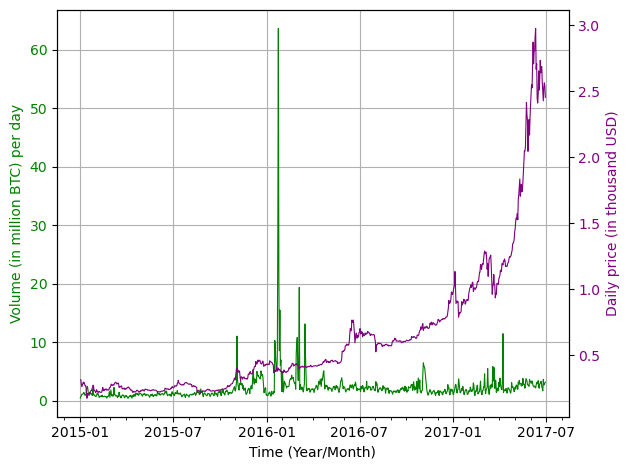

In [14]:
plt.figure(figsize=(14,7))

plt.style.use('default')

fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('Time (Year/Month)')
ax1.set_ylabel('Volume (in million BTC) per day', color=color)
ax1.plot(global_data['date'], global_data['volume_without_self'] / 100000000000000, linewidth=0.8, color=color, label='Transactions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'purple'
ax2.set_ylabel('Daily price (in thousand USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(external_data['date'], external_data['PriceUSD'] / 1000, linewidth=0.8, color=color, label='volume')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

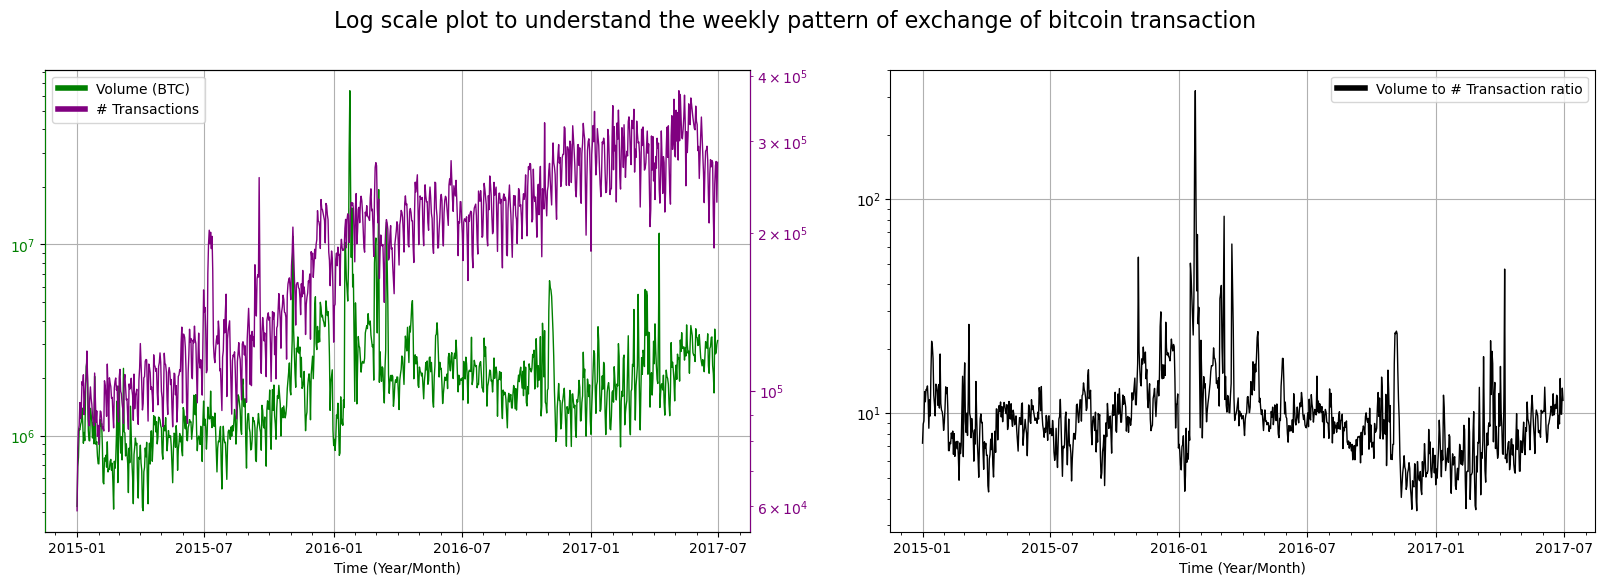

In [15]:
plt.style.use('default')
global_data['date'] = pd.to_datetime(global_data['date'])

fig, ax = plt.subplots(1,2, figsize=(20, 6))
fig.suptitle('Log scale plot to understand the weekly pattern of exchange of bitcoin transaction', fontsize=16)

ax1 = ax[0]
ax3 = ax[1]

color = 'green'
ax1.set_yscale('log')
ax1.set_xlabel('Time (Year/Month)')
ax1.plot(global_data['date'], global_data['volume_without_self'] / 100000000, color=color, label='Volume (BTC)', lw=1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

ax2 = ax1.twinx()
color='purple'
ax2.set_yscale('log')
ax2.plot(global_data['date'], global_data['nb_transactions'], color=color, label='# Transactions', lw=1)
ax2.tick_params(axis='y', colors='purple', which='both')
custom_lines = [Line2D([0], [0], color='green', lw=4), Line2D([0], [0], color='purple', lw=4)]
ax2.legend(custom_lines, ['Volume (BTC)', '# Transactions'])
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('green')

ax3.plot(global_data['date'], (global_data['volume_without_self'] / 100000000) / global_data['nb_transactions'], color='black', label='Volume to # Transaction ratio', lw=1)
ax3.set_yscale('log')
ax3.set_xlabel('Time (Year/Month)')
ax3.grid(True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
custom_line = Line2D([0], [0], color='black', lw=4)
ax3.legend([custom_line], ['Volume to # Transaction ratio'])

<Figure size 1400x700 with 0 Axes>

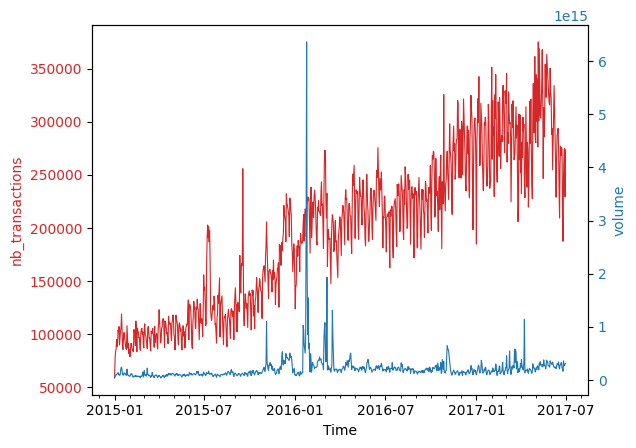

In [69]:
plt.figure(figsize=(14,7))

plt.style.use('default')

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('nb_transactions', color=color)
ax1.plot(global_data['date'], global_data['nb_transactions'], linewidth=0.8, color=color, label='Transactions')
ax1.tick_params(axis='y', labelcolor=color)


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
ax2.plot(global_data['date'], global_data['volume_without_self'],  linewidth=0.8, color=color, label='volume')
ax2.tick_params(axis='y', labelcolor=color)


Trop joli le schéma

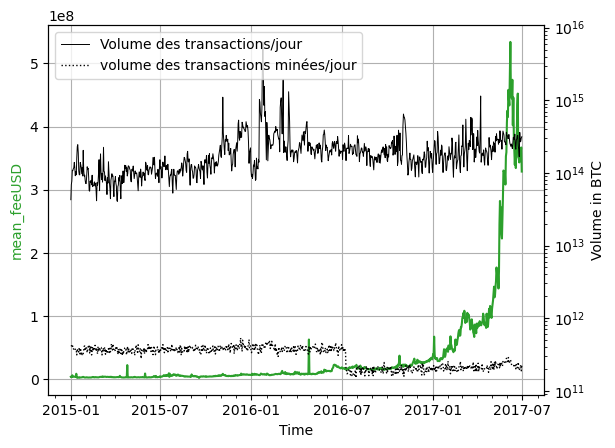

In [17]:


plt.style.use('default')
global_data['date'] = pd.to_datetime(global_data['date'])

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Time')
ax1.set_ylabel('mean_feeUSD', color=color)
ax1.plot(global_data['date'], global_data['mean_feeUSD'], color=color, label='Prix journalier moyen en USD')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

ax1.grid(True)

ax2 = ax1.twinx()

ax2.set_ylabel('Volume in BTC')
ax2.plot(global_data['date'],global_data['volume_without_self'], color='k', linewidth=0.7, label='Volume des transactions/jour'),
ax2.plot(global_data['date'],global_data['total_mining_satoshi'], color='k', linestyle=':',  linewidth=1, label='volume des transactions minées/jour'),

plt.yscale('log')


plt.legend(loc='upper left')

### The weekly pattern of bitcoin volume and transactions

In [26]:
from scipy.stats import sem

global_data['day_of_week'] = global_data['date'].dt.dayofweek

grouped_g_d1 = global_data.groupby(['day_of_week', pd.Grouper(key='date', freq='W-MON')])['nb_transactions'].sum().reset_index()
grouped_g_d2 = global_data.groupby(['day_of_week', pd.Grouper(key='date', freq='W-MON')])['volume_without_self'].sum().reset_index()

# Calculate the logarithm of transaction_count and daily volume
grouped_g_d1['log_transaction_count'] = np.log(grouped_g_d1['nb_transactions'])
grouped_g_d2['log_volume'] = np.log(grouped_g_d2['volume_without_self'])

# Calculate the average of log_transaction_count and log_volume for each day of the week
avg_log_transaction_count = grouped_g_d1.groupby('day_of_week')['log_transaction_count'].mean()
avg_log_volume = grouped_g_d2.groupby('day_of_week')['log_volume'].mean()

# Calculate the standard error of the mean (SEM) for each day of the week
sem_log_transaction_count = grouped_g_d1.groupby('day_of_week')['log_transaction_count'].apply(sem)
sem_log_volume = grouped_g_d2.groupby('day_of_week')['log_volume'].apply(sem)

# Map day_of_week integers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sem_log_transaction_count.index = day_names
avg_log_transaction_count.index = day_names

sem_log_volume.index = day_names
avg_log_volume.index = day_names


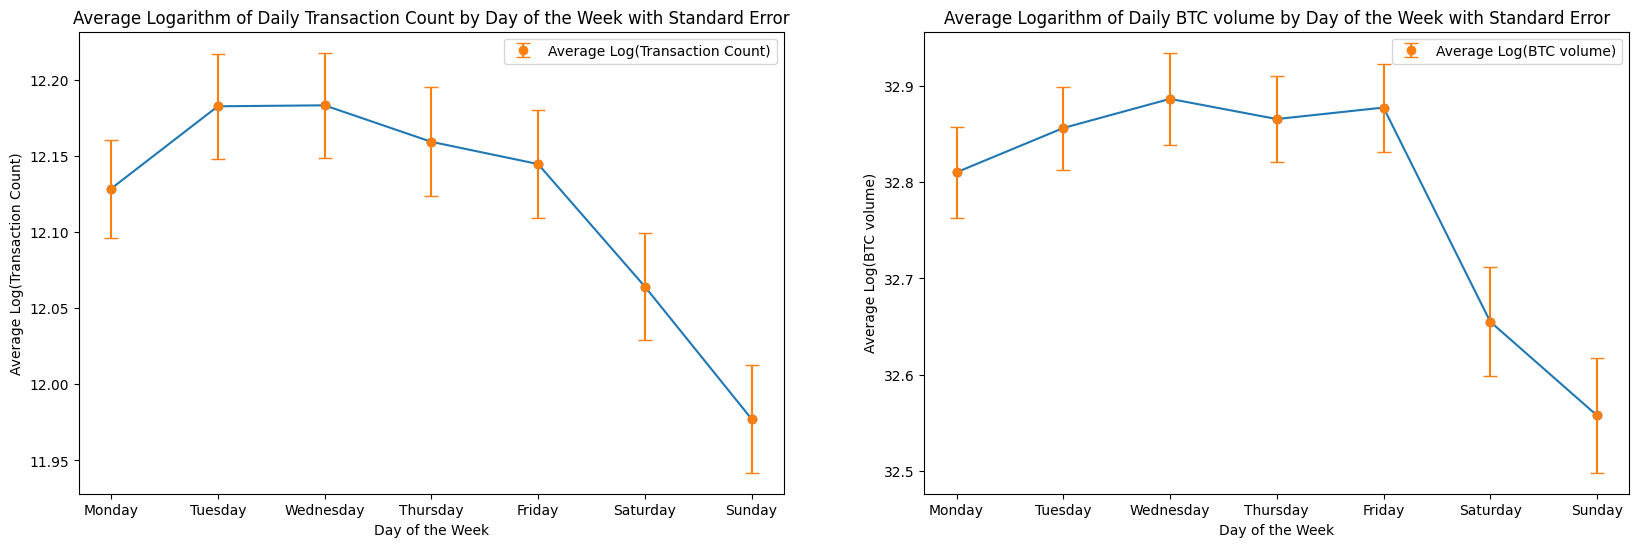

In [68]:

# Create a bar chart with error bars representing SEM
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax1 = ax[0]
ax2 = ax[1]


ax1.plot(avg_log_transaction_count.index, avg_log_transaction_count.values, marker='o')
ax1.errorbar(avg_log_transaction_count.index, avg_log_transaction_count.values, yerr=sem_log_transaction_count.values,  fmt='o', capsize=5, label='Average Log(Transaction Count)')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Log(Transaction Count)')
ax1.set_title('Average Logarithm of Daily Transaction Count by Day of the Week with Standard Error')
ax1.legend()

ax2.plot(avg_log_volume.index, avg_log_volume.values, marker='o')
ax2.errorbar(avg_log_volume.index, avg_log_volume.values, yerr=sem_log_volume.values, fmt='o', capsize=5, label='Average Log(BTC volume)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Average Log(BTC volume)')
ax2.set_title('Average Logarithm of Daily BTC volume by Day of the Week with Standard Error')
ax2.legend()
plt.show()

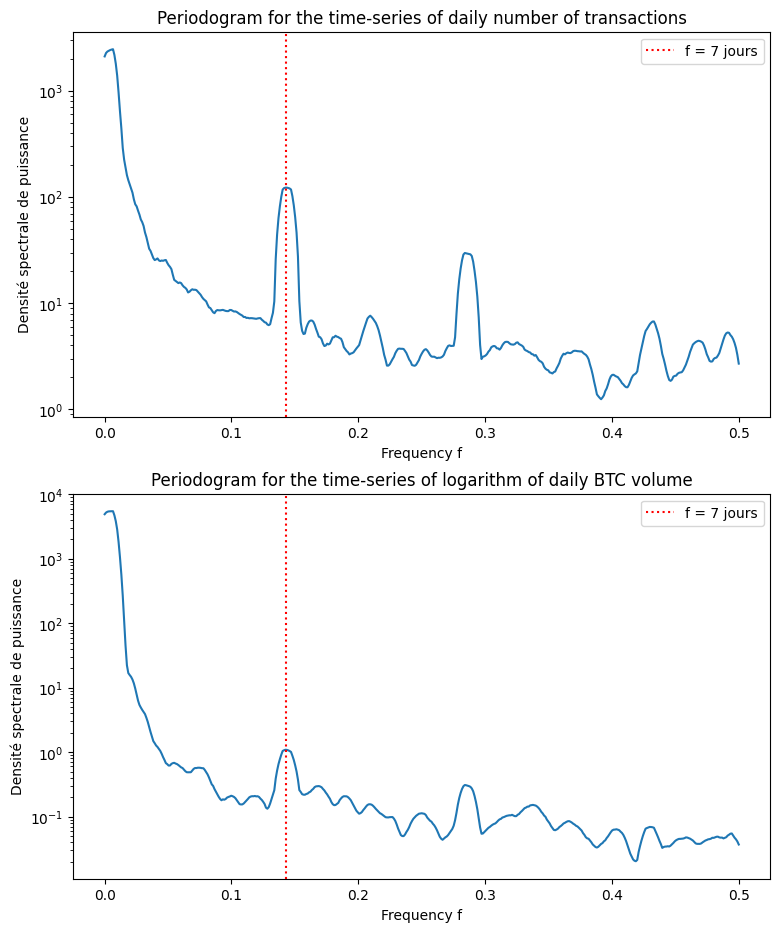

In [67]:
from scipy import signal

x_transac = global_data['nb_transactions'].values
x_volume = np.log(global_data['volume_without_self'].values)

fs = 1

# Define the tapering window
n_taper = int(len(x_transac) * 0.1)
taper_window = np.concatenate([np.linspace(0, 1, n_taper, endpoint=False),
                                np.ones(len(x_transac) - 2*n_taper),
                                np.linspace(1, 0, n_taper, endpoint=False)])

# Apply the tapering window to the data
x_t_tapered = x_transac * taper_window
x_v_tapered = x_volume * taper_window

# Calculer le periodogramme
f_transac, Pxx_transac = signal.periodogram(x_t_tapered, window='boxcar', fs=fs, detrend='linear')
f_volume, Pxx_volume = signal.periodogram(x_v_tapered, window='boxcar', fs=fs, detrend='linear')

Pxx_transac[0] = Pxx_transac[1]
Pxx_volume[0] = Pxx_volume[1]

# Appliquer le lissage modifié de Daniell avec des moyennes mobiles simples successives de longueurs 6 et 12
w1 = np.ones(6)/6
w2 = np.ones(12)/12
Pxx_t_smoothed = np.convolve(np.convolve(Pxx_transac, w1, mode='same'), w2, mode='same')
Pxx_v_smoothed = np.convolve(np.convolve(Pxx_volume, w1, mode='same'), w2, mode='same')

plt.figure(figsize=(9, 11))
plt.subplot(2, 1, 1)
# Tracer le periodogramme avec le lissage modifié de Daniell
#Pxx_smoothed[0] = Pxx_smoothed[1]
plt.yscale('log')
plt.semilogy(f_transac, Pxx_t_smoothed/10e7)
plt.xlabel('Frequency f')
plt.axvline(1/7, color='r', linestyle='dotted', label='f = 7 jours')
plt.ylabel('Densité spectrale de puissance')
plt.title('Periodogram for the time-series of daily number of transactions')
plt.legend()

plt.subplot(2, 1, 2)
# Tracer le periodogramme avec le lissage modifié de Daniell
#Pxx_smoothed[0] = Pxx_smoothed[1]
plt.yscale('log')
plt.semilogy(f_volume, Pxx_v_smoothed)
plt.xlabel('Frequency f')
plt.axvline(1/7, color='r', linestyle='dotted', label='f = 7 jours')
plt.ylabel('Densité spectrale de puissance')
plt.title('Periodogram for the time-series of logarithm of daily BTC volume')
plt.legend()
plt.show()


### The outliers’ transaction patterns

In [21]:
# get sub frame
start_date = datetime.strptime('2016-01-06', '%Y-%m-%d')
end_date = datetime.strptime('2016-02-12', '%Y-%m-%d')
global_data_january = global_data.loc[(global_data['date'] > start_date) & (global_data['date'] < end_date)]
external_data_january = external_data.loc[(external_data['date'] > start_date) & (global_data['date'] < end_date)]
external_data_january

,date,PriceUSD,HashRate
370,2016-01-07,459.208940,7.590962e+05
371,2016-01-08,454.134424,8.933581e+05
372,2016-01-09,449.845216,7.797519e+05
373,2016-01-10,448.580216,9.036860e+05
374,2016-01-11,449.033059,8.778664e+05
375,2016-01-12,441.768157,8.778664e+05
376,2016-01-13,432.310645,8.137102e+05
377,2016-01-14,429.823225,7.494381e+05
378,2016-01-15,367.823200,6.874545e+05
379,2016-01-16,388.071205,8.001519e+05


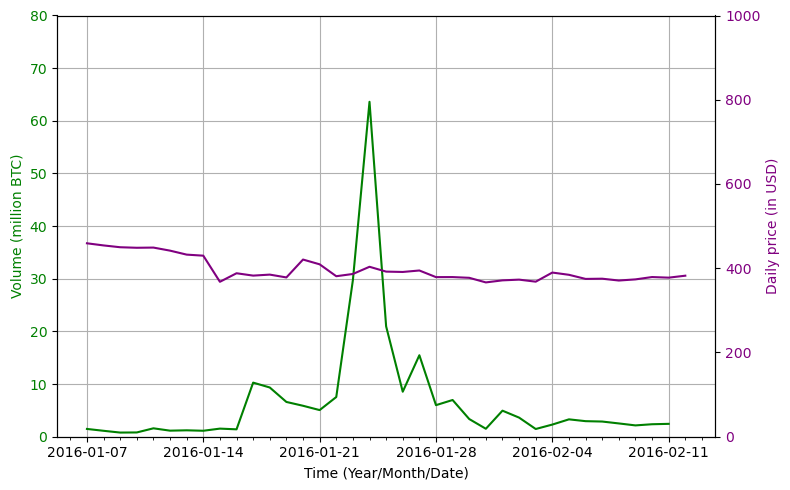

In [22]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'green'
ax1.set_xlabel('Time (Year/Month/Date)')
ax1.set_ylabel('Volume (million BTC)', color=color)
ax1.plot(global_data_january['date'], global_data_january['volume_without_self'] / 100000000000000, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.set_ylim(ymin=0, ymax=80)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'purple'
ax2.set_ylabel('Daily price (in USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(external_data_january['date'], external_data_january['PriceUSD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(ymin=0, ymax=1000)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

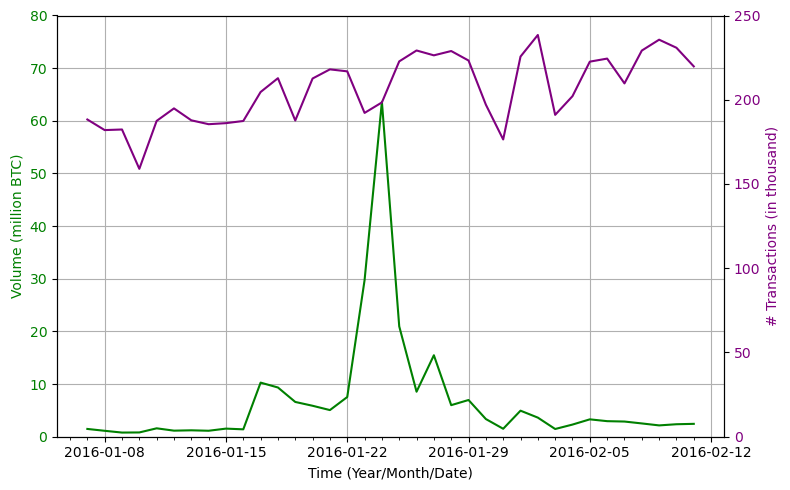

In [23]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'green'
ax1.set_xlabel('Time (Year/Month/Date)')
ax1.set_ylabel('Volume (million BTC)', color=color)
ax1.plot(global_data_january['date'], global_data_january['volume_without_self'] / 100000000000000, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.set_ylim(ymin=0, ymax=80)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'purple'
ax2.set_ylabel('# Transactions (in thousand)', color=color)  # we already handled the x-label with ax1
ax2.plot(global_data_january['date'], global_data_january['nb_transactions'] / 1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(ymin=0, ymax=250)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [24]:
# get data about transactions from 21st to 28th January 2016
data21 = pd.read_csv('egc2024/networks/2016-1-21.csv')
data22 = pd.read_csv('egc2024/networks/2016-1-22.csv')
data23 = pd.read_csv('egc2024/networks/2016-1-23.csv')
data24 = pd.read_csv('egc2024/networks/2016-1-24.csv')
data25 = pd.read_csv('egc2024/networks/2016-1-25.csv')
data26 = pd.read_csv('egc2024/networks/2016-1-26.csv')
data27 = pd.read_csv('egc2024/networks/2016-1-27.csv')

week_data = pd.concat([data21, data22, data23, data24, data25, data26, data27], axis=0)

week_data = week_data.sort_values('value', ascending=False)

week_data = week_data.reset_index()

week_data = week_data.drop('index', axis=1)

week_data

,Source,Target,value,nb_transactions
0,ePay.info_CoinJoinMess,424,75948861593964,786
1,ePay.info_CoinJoinMess,424,75424051361775,783
2,ePay.info_CoinJoinMess,424,75193512556368,794
3,ePay.info_CoinJoinMess,424,72963965411220,780
4,ePay.info_CoinJoinMess,Huobi.com,72207713283905,762
...,...,...,...,...
51004,24438,20042,5860,1
51005,16621,170,5248,1
51006,7328,Xapo.com,5000,1
51007,71632776,34698,2749,1


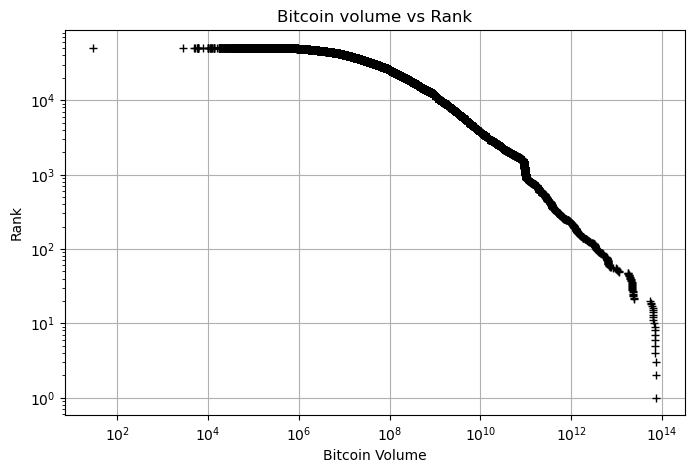

In [25]:
plt.figure(figsize=(8,5))

plt.loglog(week_data['value'], week_data.index, '+', color='black')

plt.title('Bitcoin volume vs Rank')
plt.xlabel('Bitcoin Volume')
plt.ylabel('Rank')

plt.grid(True)

# Afficher le graphique
plt.show()

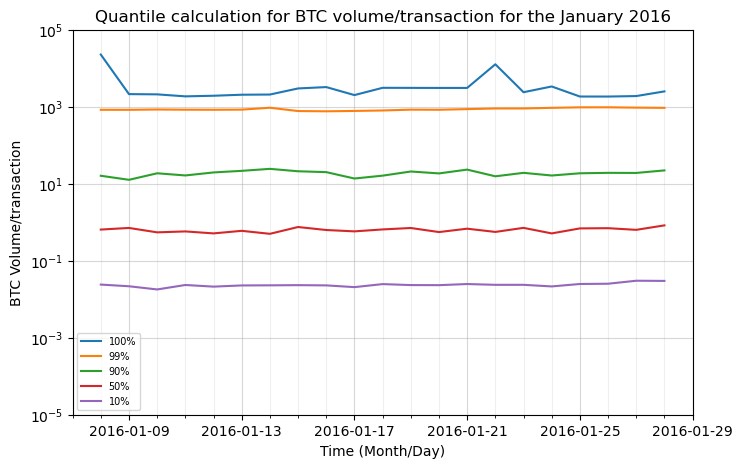

In [26]:
day = 8
quantiles = pd.DataFrame(columns=['date', '10%', '50%', '90%', '99%', '100%',])
i = 0
while (day <= 28):
    data = pd.read_csv('egc2024/networks/2016-1-' + str(day) + '.csv')
    # extract volume/transaction
    volume_per_transaction = (data.value / 100000000) / data.nb_transactions
    quantiles.loc[i] = ['2016-1-' + str(day),
                         volume_per_transaction.quantile(0.10),
                         volume_per_transaction.quantile(0.50),
                         volume_per_transaction.quantile(0.90),
                         volume_per_transaction.quantile(0.99),
                         volume_per_transaction.quantile(1.0),]
    day += 1
    i += 1
quantiles["date"] = pd.to_datetime(quantiles["date"])

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(quantiles['date'], quantiles['100%'], label='100%')
ax.plot(quantiles['date'], quantiles['99%'], label='99%')
ax.plot(quantiles['date'], quantiles['90%'], label='90%')
ax.plot(quantiles['date'], quantiles['50%'], label='50%')
ax.plot(quantiles['date'], quantiles['10%'], label='10%')

plt.yscale('log')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_ylim(ymin=0.00001, ymax=100000)
ax.set_xlabel('Time (Month/Day)')
ax.set_ylabel('BTC Volume/transaction')
ax.set_title('Quantile calculation for BTC volume/transaction for the January 2016')
ax.legend(fontsize=7, loc='lower left')

plt.show()

bla bla bla, expliquer qu'on trouve pas grand chose car que les plus gros acteurs etc

### Directed transaction graph and degree correlation to visualize outliers’ activities

In [111]:

# get data about transactions from 21st to 28th January 2016
data21 = pd.read_csv('egc2024/networks/2016-1-21.csv')
data22 = pd.read_csv('egc2024/networks/2016-1-22.csv')
data23 = pd.read_csv('egc2024/networks/2016-1-23.csv')
data24 = pd.read_csv('egc2024/networks/2016-1-24.csv')

week_data = pd.concat([data21, data22, data23, data24], axis=0)

week_data

,Source,Target,value,nb_transactions
0,Xapo.com,24179,2020749278,2
1,47654,269,11000024,1
2,CoinPayments.net,72025812,4660114,1
3,855,HaoBTC.com,12200264,1
4,6882,883,1500888000,1
...,...,...,...,...
6458,69278079,72865517,49931146,1
6459,2990531,73126948,2166322,1
6460,70953422,227,5049000,1
6461,Xapo.com,131,4565200796,1


In [121]:
# get data about transactions from 21st to 24th January 2016
data21 = pd.read_csv('egc2024/networks/2016-1-21.csv')
data22 = pd.read_csv('egc2024/networks/2016-1-22.csv')
data23 = pd.read_csv('egc2024/networks/2016-1-23.csv')
data24 = pd.read_csv('egc2024/networks/2016-1-24.csv')

df = pd.concat([data21, data22, data23, data24], axis=0)

# Créer un nouveau dataframe avec une colonne pour les acteurs
actors = pd.concat([df['Source'], df['Target']]).unique()
new_df = pd.DataFrame({'actor': actors})

# Calculer le nombre de transactions entrantes pour chaque acteur
indeg_df = df.groupby('Target').agg({'nb_transactions': 'sum'})
indeg_df = indeg_df.reset_index().rename(columns={'Target': 'actor', 'nb_transactions': 'indeg'})
new_df = new_df.merge(indeg_df, on='actor', how='left').fillna(0)

#sorted_df = new_df.sort_values(by='indeg', ascending=False)
#sorted_df.head(50)

# Calculer le nombre de transactions sortantes pour chaque acteur
outdeg_df = df.groupby('Source').agg({'nb_transactions': 'sum'})
outdeg_df = outdeg_df.reset_index().rename(columns={'Source': 'actor', 'nb_transactions': 'outdeg'})
new_df = new_df.merge(outdeg_df, on='actor', how='left').fillna(0)

# Trouver les valeurs maximales de indeg et outdeg ????
indeg_max = int(new_df['indeg'].max())
outdeg_max = int(new_df['outdeg'].max()) 

# Créer une table de pivot avec des acteurs en tant qu'index et colonnes
pivot_df = new_df.pivot_table(index='indeg', columns='outdeg', values='actor', aggfunc='count', fill_value=0)

pivot_df


# changer les noms des colonnes en appliquant np.log10()
#pivot_df = pivot_df.rename(columns={col: np.log(col) for col in pivot_df.columns if col != 0})

#new_index = pivot_df.index.map(lambda x: np.log(x) if x != 0 else x)
#pivot_df = pivot_df.rename_axis(index=lambda x: f'log10({x})' if x != 0 else x).set_index(new_index)

#pivot_df


outdeg,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2424.0,3425.0,4128.0,5300.0,6524.0,10199.0,12762.0,17846.0,19351.0,33489.0
indeg,,,,,,,,,,,,,,,,,,,,,
0.0,0,648,321,176,111,59,53,33,22,18,...,0,0,0,0,0,0,0,0,0,0
1.0,729,239,128,69,50,27,28,16,11,7,...,0,0,0,0,0,0,0,0,0,0
2.0,296,124,74,49,25,29,9,12,7,10,...,0,0,0,0,0,0,0,0,0,0
3.0,140,68,48,31,30,26,9,10,4,6,...,0,0,0,0,0,0,0,0,0,0
4.0,77,49,49,28,27,11,18,6,7,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7592.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


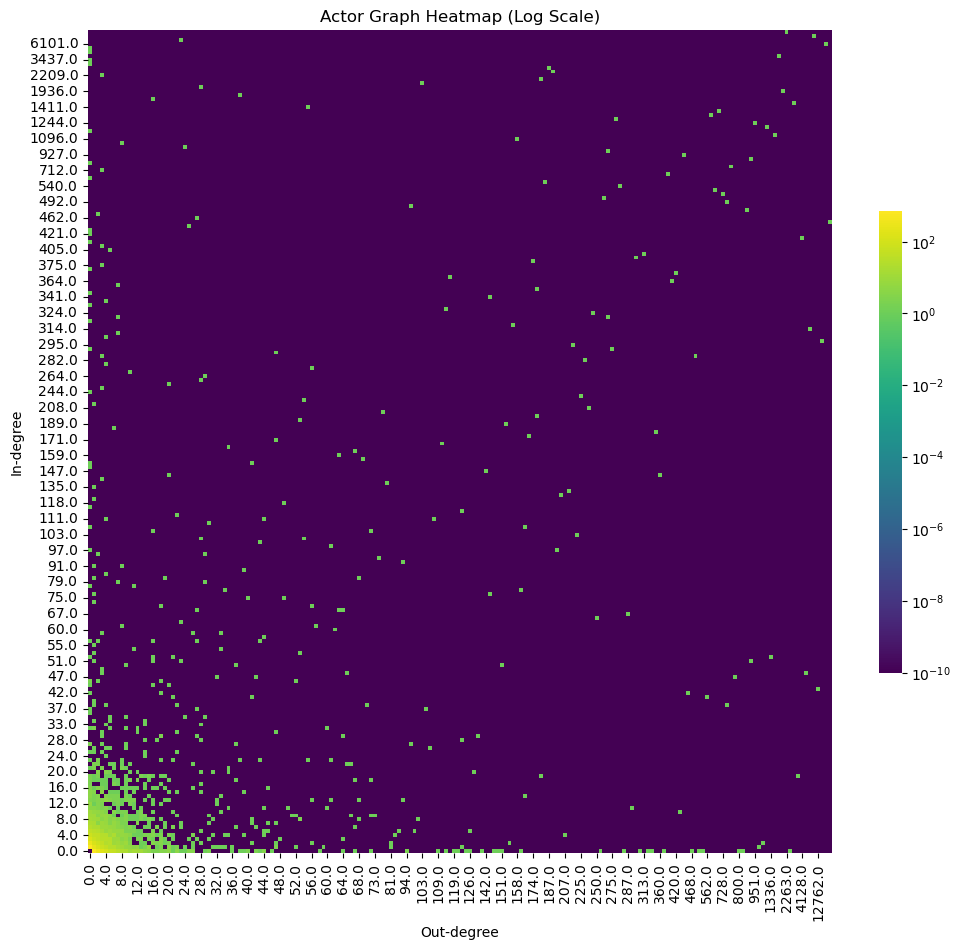

In [149]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(12, 12)) # set figsize to (10, 8) inches
sns.heatmap(pivot_df, square=True, linewidths=0, cmap='viridis', cbar_kws={'shrink': 0.5}, norm=(LogNorm()))
ax.invert_yaxis() # invert y-axis
#ax.set_xlim(xmin=0, xmax=30)
#ax.set_ylim(ymin=0, ymax=30)
plt.xlabel('Out-degree')
plt.ylabel('In-degree')
plt.title('Actor Graph Heatmap (Log Scale)')
plt.show()

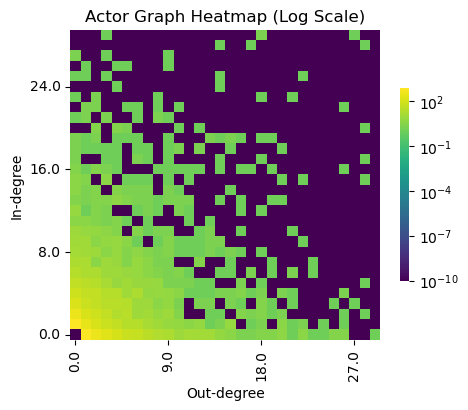

In [148]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(5, 5)) # set figsize to (10, 8) inches
sns.heatmap(pivot_df, square=True, linewidths=0, cmap='viridis', cbar_kws={'shrink': 0.5}, norm=(LogNorm()))
ax.invert_yaxis() # invert y-axis
ax.set_xlim(xmin=0, xmax=30)
ax.set_ylim(ymin=0, ymax=30)
plt.xlabel('Out-degree')
plt.ylabel('In-degree')
plt.title('Actor Graph Heatmap (Log Scale)')
plt.show()

Expliquer que voila, on trouve les anomalies, grand acteurs tous les petits points a l'exterieur du carre 30 x 30 etc